Análisis de datos del ensayo de emisiones en cc trigo-soja 2018/2020

Exploracion de datos

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/ensayoCC_2018



/content/drive/MyDrive/Colab Notebooks/ensayoCC_2018


In [3]:
import pandas as pd

# load the training dataset
RF_data = pd.read_excel('RF.xlsx')
RF_data.head(30)

,muestreo,Fecha,ano,bk,tt,cultivo,Estadio,ts,ta,hum,...,n2o,ch4,co2,pp_acum2,pp_acum5,ts_log_media,ts_log_hora,ts_EMA,hum_log_media,hum_log_hora
0,2,2018-09-19,1,1,SC,Trigo,Z1.3,7.3,8.7,25.194401,...,-7.622626,-6.596252,78.231645,18.7,22.5,12.0,14.0,15.7,239.0,245.0
1,2,2018-09-19,1,1,CC,Trigo,Z1.3,7.4,8.7,29.982669,...,24.457047,-8.939569,168.340359,18.7,22.5,NaN,NaN,15.7,NaN,NaN
2,2,2018-09-19,1,2,SC,Trigo,Z1.3,7.5,8.7,25.574030,...,0.929260,1.236851,31.893263,18.7,22.5,16.0,36.0,15.7,NaN,NaN
3,2,2018-09-19,1,2,CC,Trigo,Z1.3,7.2,8.7,27.809388,...,28.012477,-8.177382,117.229110,18.7,22.5,18.0,30.0,15.7,253.0,255.0
4,2,2018-09-19,1,3,SC,Trigo,Z1.3,7.3,8.7,26.151173,...,9.481146,-8.662879,111.704584,18.7,22.5,16.0,36.0,15.7,NaN,NaN
5,2,2018-09-19,1,3,CC,Trigo,Z1.3,7.4,8.7,27.937551,...,25.184294,3.213505,61.466511,18.7,22.5,17.0,37.0,15.7,295.0,296.0
6,3,2018-10-22,1,1,SC,Trigo,Z1.4,8.2,8.7,14.390467,...,15.660926,-3.594883,55.968340,0.0,0.0,19.0,28.0,16.8,157.0,154.0
7,3,2018-10-22,1,1,CC,Trigo,Z1.4,8.2,8.7,13.636364,...,2.300037,0.156027,177.943269,0.0,0.0,NaN,NaN,16.8,NaN,NaN
8,3,2018-10-22,1,2,SC,Trigo,Z1.4,8.3,8.7,12.694301,...,4.212427,1.371350,36.673199,0.0,0.0,18.0,22.0,16.8,166.0,159.0
9,3,2018-10-22,1,2,CC,Trigo,Z1.4,7.5,8.7,14.036885,...,21.682370,-3.613002,214.989665,0.0,0.0,17.0,21.0,16.8,NaN,NaN


In [4]:
RF_data.dtypes

muestreo                  int64
Fecha            datetime64[ns]
ano                       int64
bk                        int64
tt                       object
cultivo                  object
Estadio                  object
ts                      float64
ta                      float64
hum                     float64
wfps                    float64
NO3                     float64
NH4                     float64
n2o                     float64
ch4                     float64
co2                     float64
pp_acum2                float64
pp_acum5                float64
ts_log_media            float64
ts_log_hora             float64
ts_EMA                  float64
hum_log_media           float64
hum_log_hora            float64
dtype: object

In [5]:
numeric_features = ['ts', 'wfps', 'NO3', 'NH4', 'ch4', 'co2', 'pp_acum2', 'pp_acum5']
RF_data[numeric_features + ['n2o']].describe()

,ts,wfps,NO3,NH4,ch4,co2,pp_acum2,pp_acum5,n2o
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,16.264379,46.090407,8.804265,7.684534,-0.675581,59.440748,2.252941,13.583333,37.245609
std,4.493934,12.951344,8.678045,14.511923,12.451188,59.817087,5.002279,17.292033,39.876785
min,5.766667,19.440697,0.000000,-1.400000,-77.151566,-12.249845,0.000000,0.000000,-35.402927
25%,13.875000,37.033508,2.450000,0.525000,-2.243359,8.498297,0.000000,1.000000,3.287613
50%,17.150000,47.837498,6.475000,2.100000,-0.755607,45.726611,0.000000,6.500000,13.032458
75%,19.500000,55.232344,12.293750,5.293750,0.743277,97.450365,1.400000,22.500000,84.605953
max,28.500000,89.356410,44.100000,93.450000,117.968153,320.249151,18.700000,70.700000,111.921070


In [7]:
RF_data['nitrogeno'] = RF_data['NO3'] + RF_data['NH4']

In [8]:
numeric_features = ['ts', 'wfps', 'NO3', 'NH4', 'nitrogeno', 'ch4', 'co2', 'pp_acum2', 'pp_acum5']
RF_data[numeric_features + ['n2o']].describe()

,ts,wfps,NO3,NH4,nitrogeno,ch4,co2,pp_acum2,pp_acum5,n2o
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,16.264379,46.090407,8.804265,7.684534,16.488799,-0.675581,59.440748,2.252941,13.583333,37.245609
std,4.493934,12.951344,8.678045,14.511923,17.248751,12.451188,59.817087,5.002279,17.292033,39.876785
min,5.766667,19.440697,0.000000,-1.400000,0.000000,-77.151566,-12.249845,0.000000,0.000000,-35.402927
25%,13.875000,37.033508,2.450000,0.525000,5.078750,-2.243359,8.498297,0.000000,1.000000,3.287613
50%,17.150000,47.837498,6.475000,2.100000,12.512500,-0.755607,45.726611,0.000000,6.500000,13.032458
75%,19.500000,55.232344,12.293750,5.293750,20.650000,0.743277,97.450365,1.400000,22.500000,84.605953
max,28.500000,89.356410,44.100000,93.450000,105.350000,117.968153,320.249151,18.700000,70.700000,111.921070


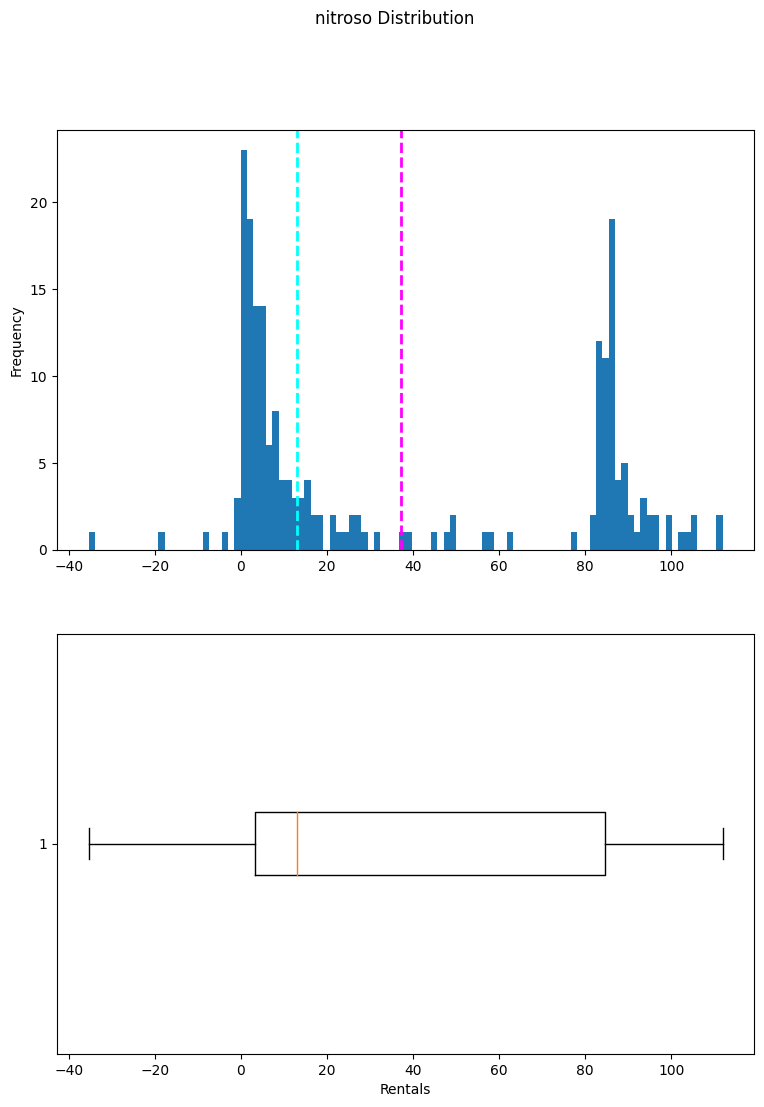

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = RF_data['n2o']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('nitroso Distribution')

# Show the figure
fig.show()

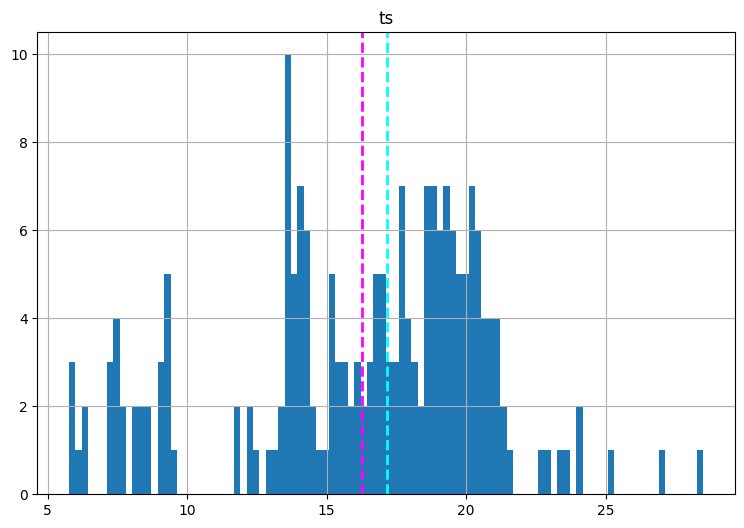

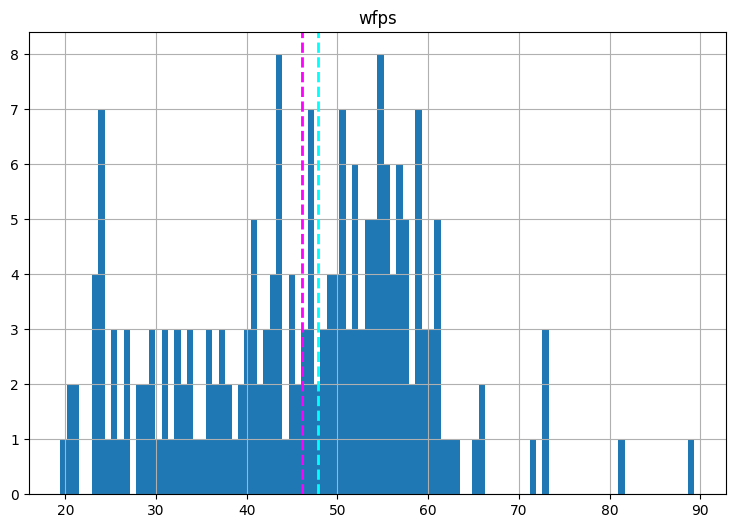

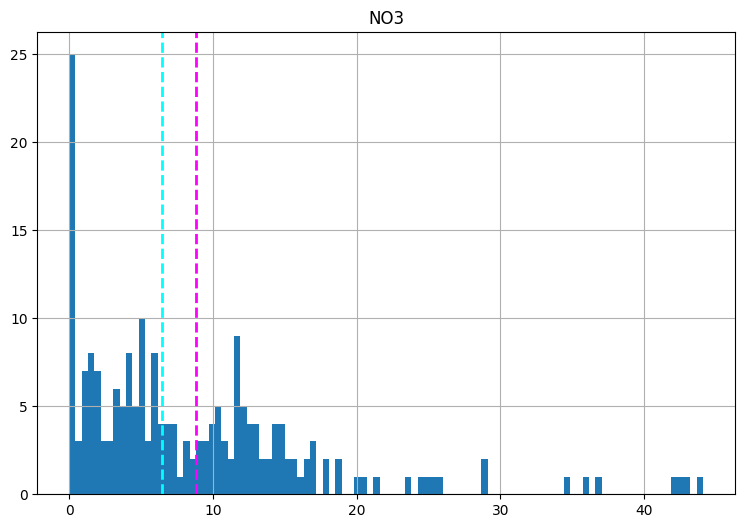

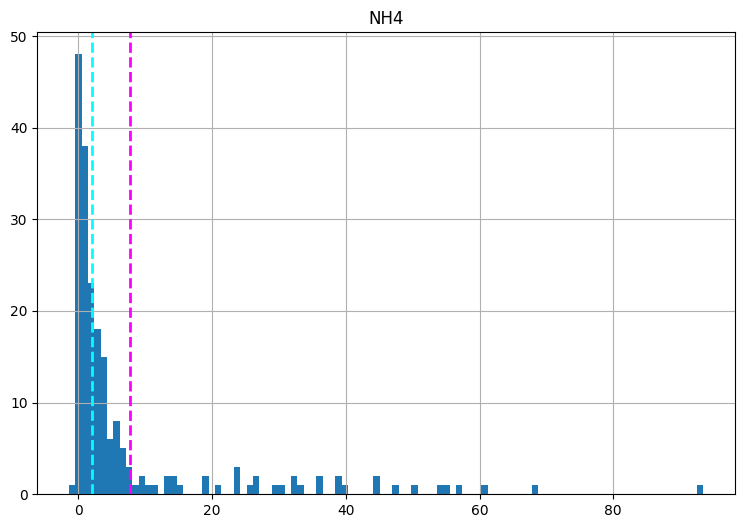

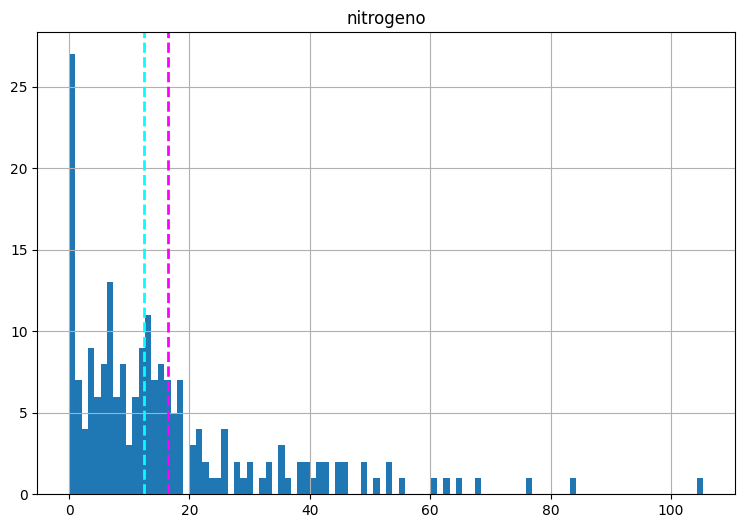

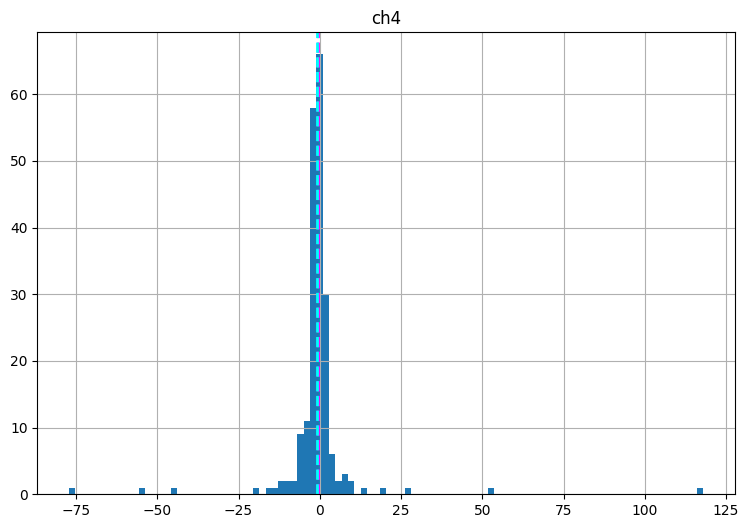

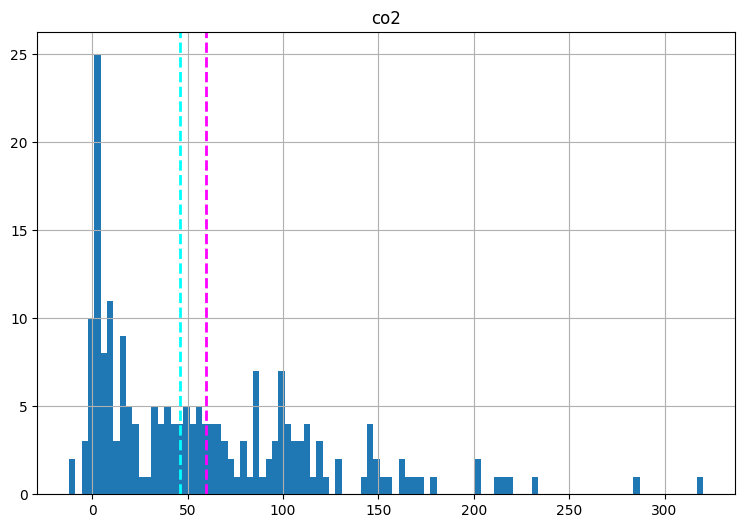

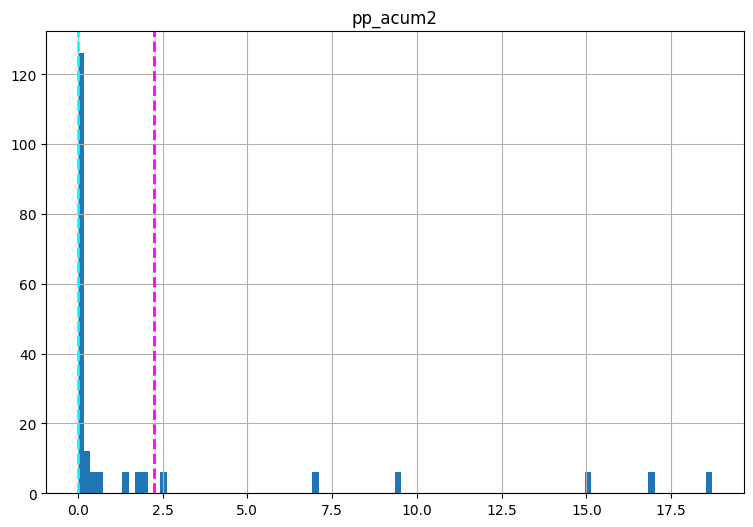

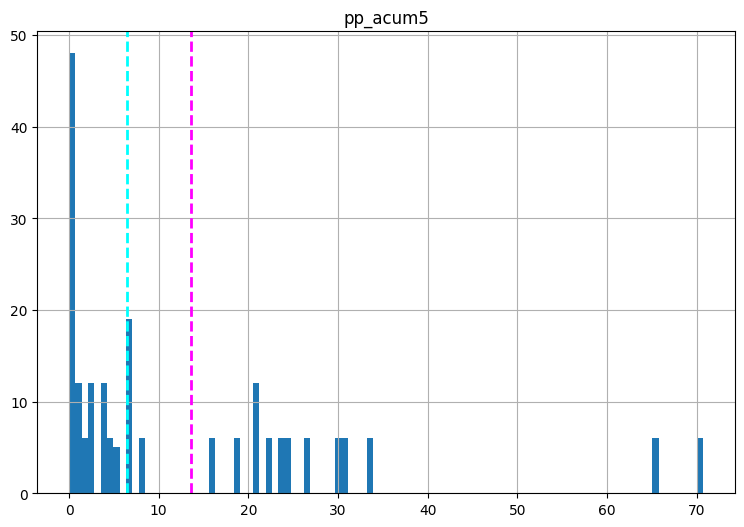

In [10]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = RF_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

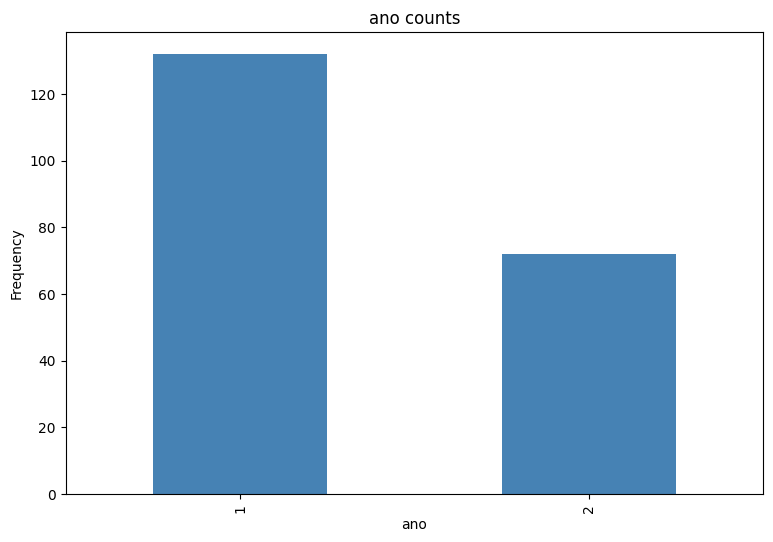

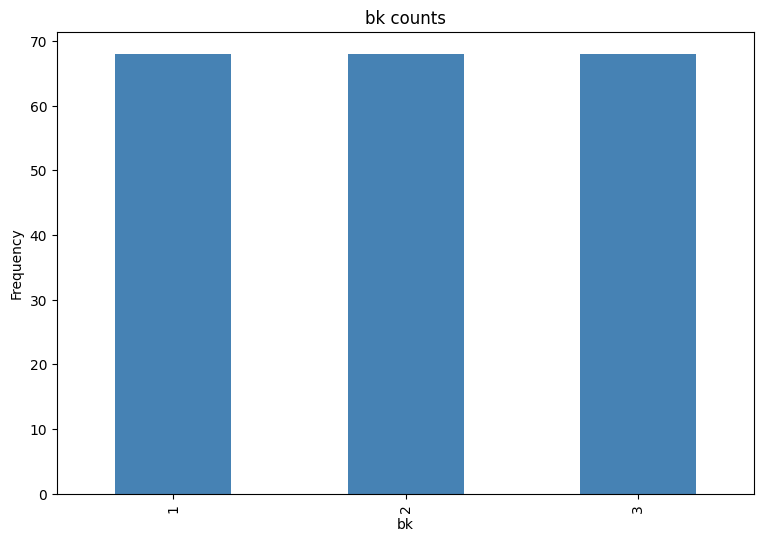

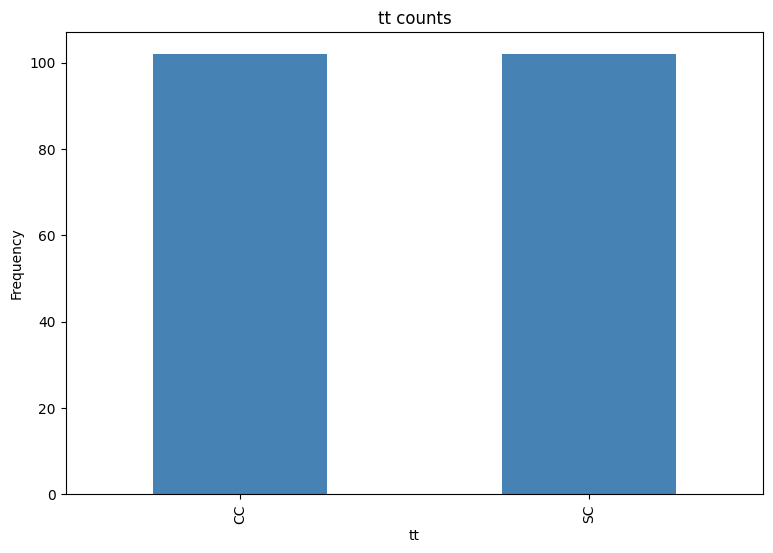

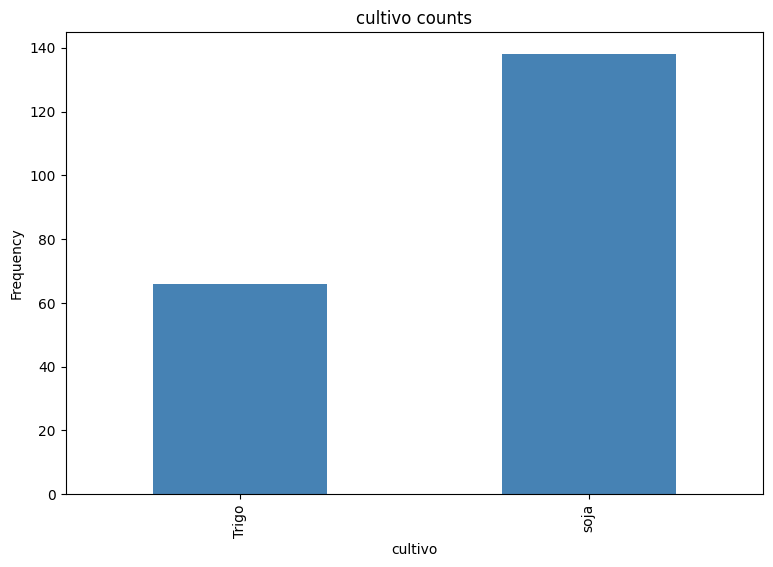

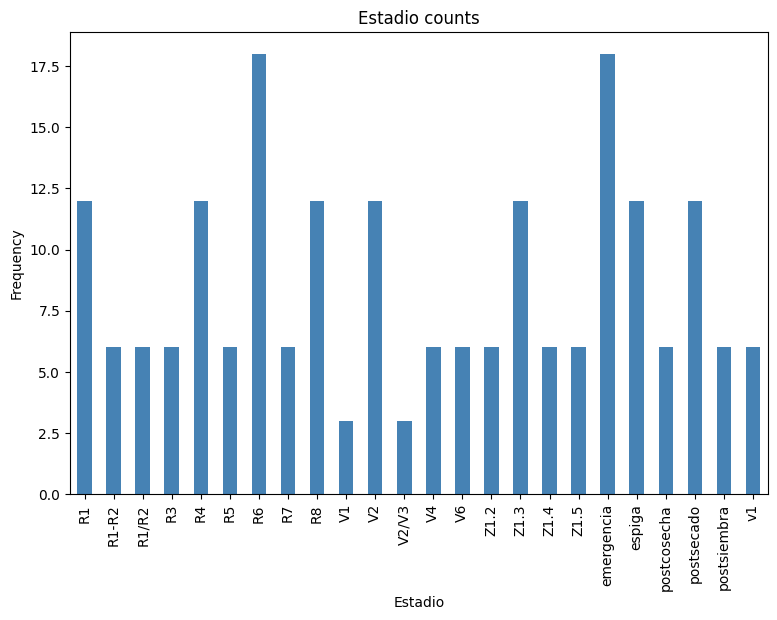

In [11]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['ano','bk','tt','cultivo','Estadio']

for col in categorical_features:
    counts = RF_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

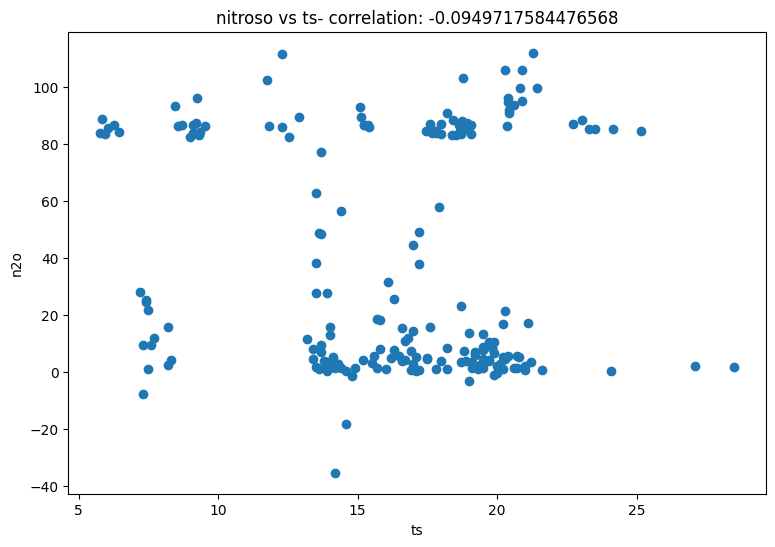

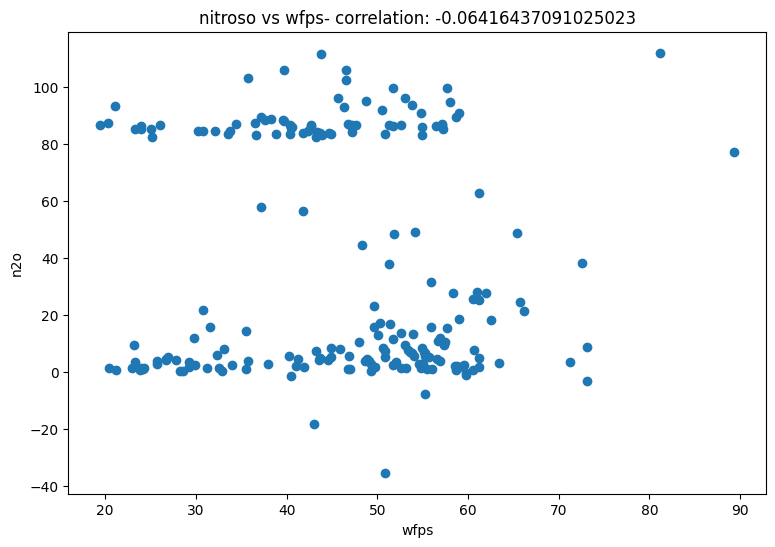

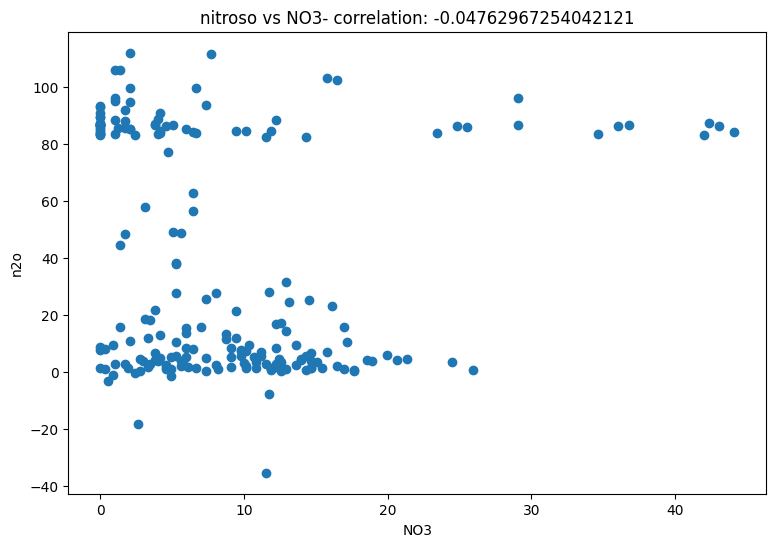

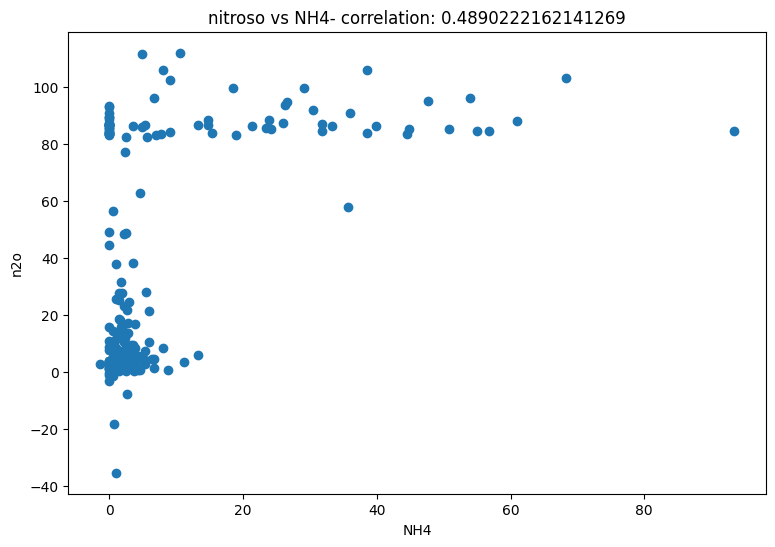

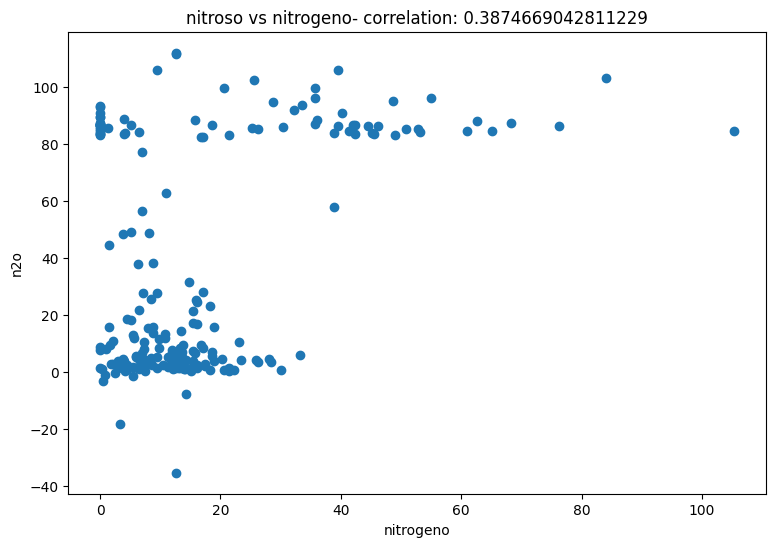

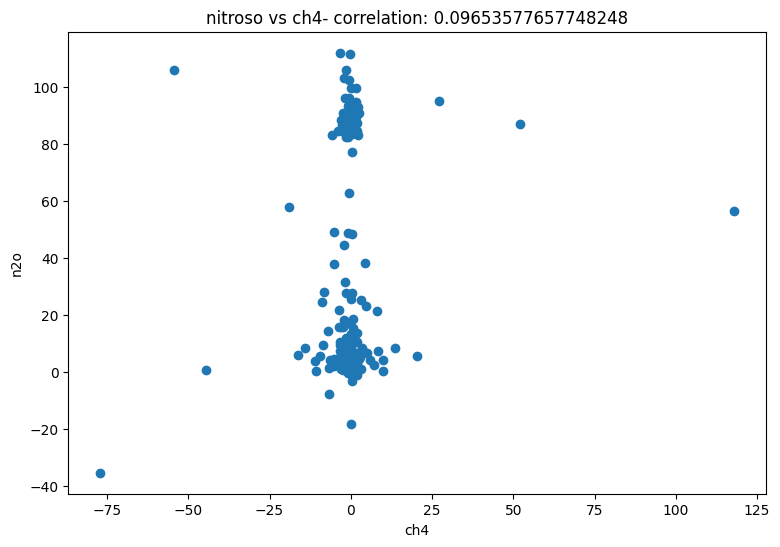

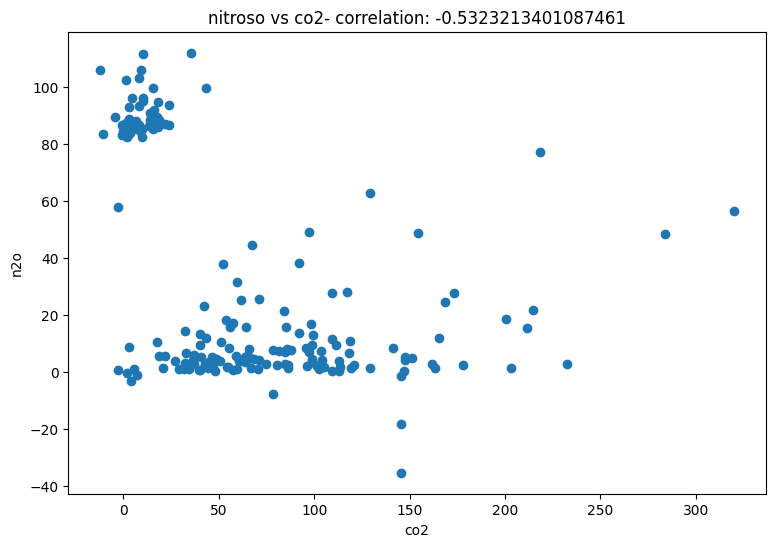

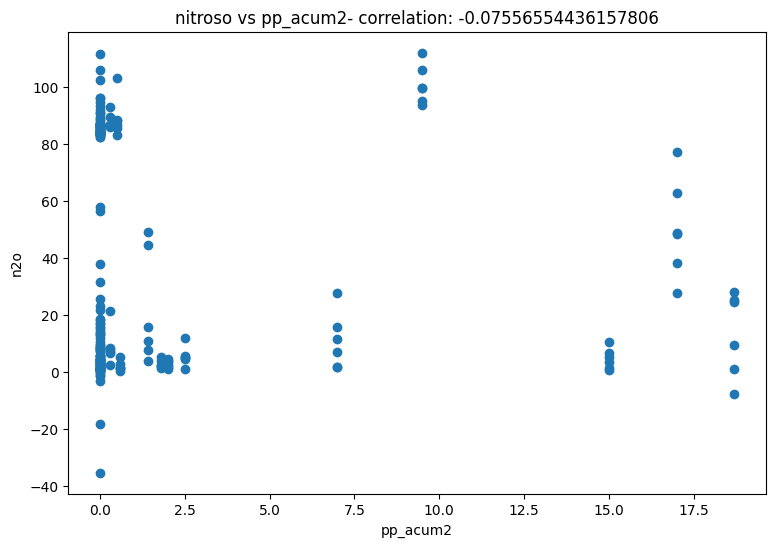

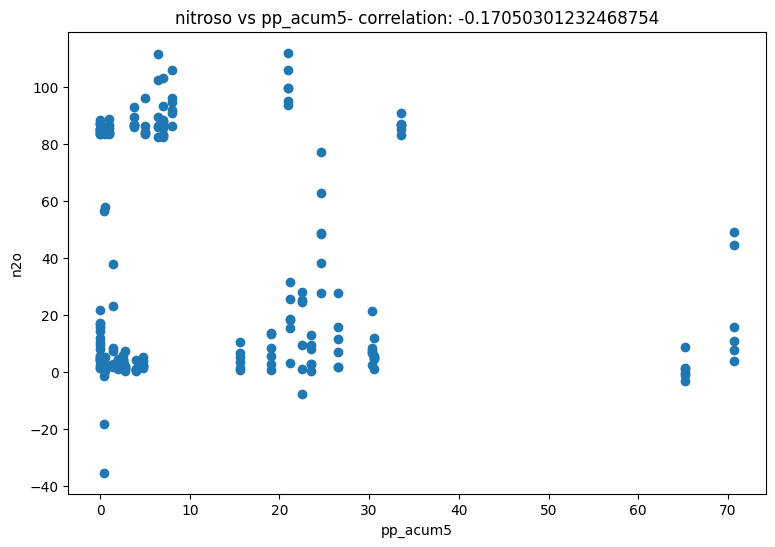

In [12]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = RF_data[col]
    label = RF_data['n2o']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('n2o')
    ax.set_title('nitroso vs ' + col + '- correlation: ' + str(correlation))
plt.show()

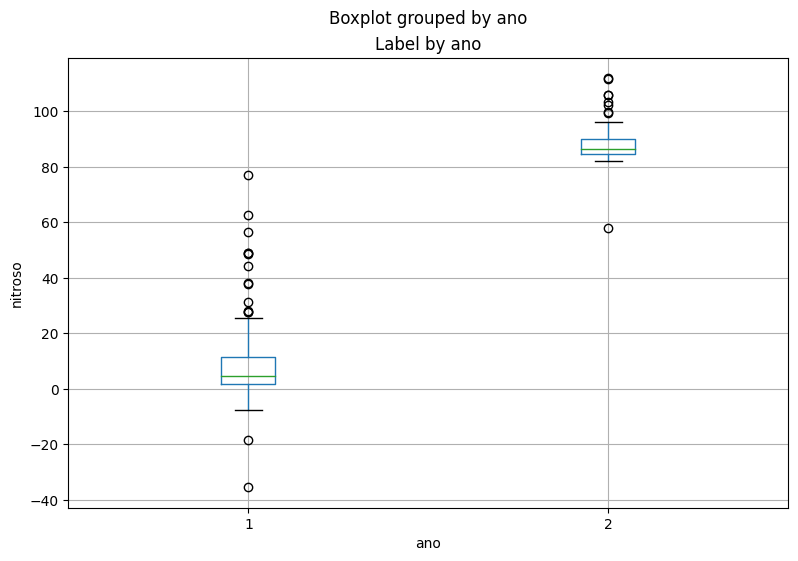

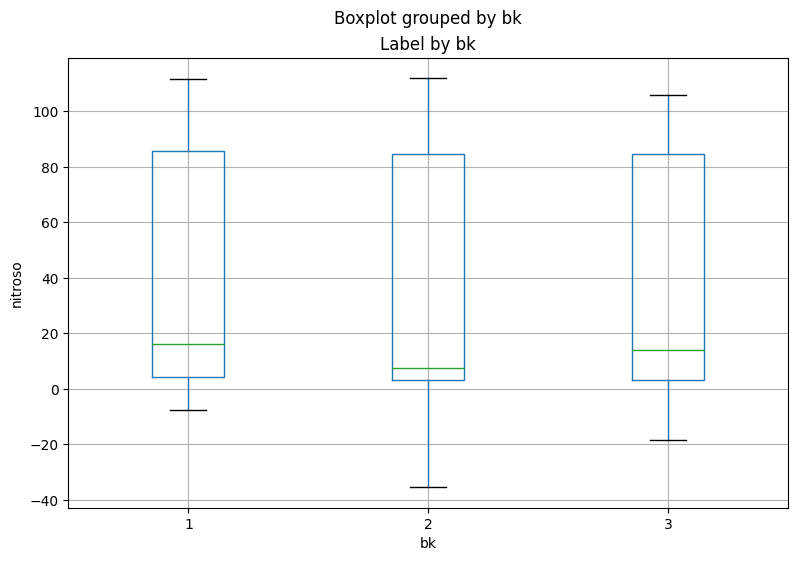

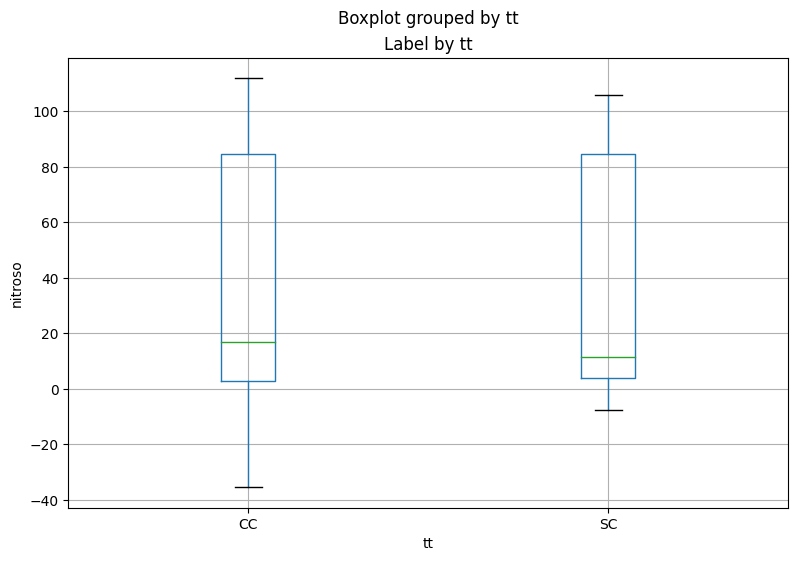

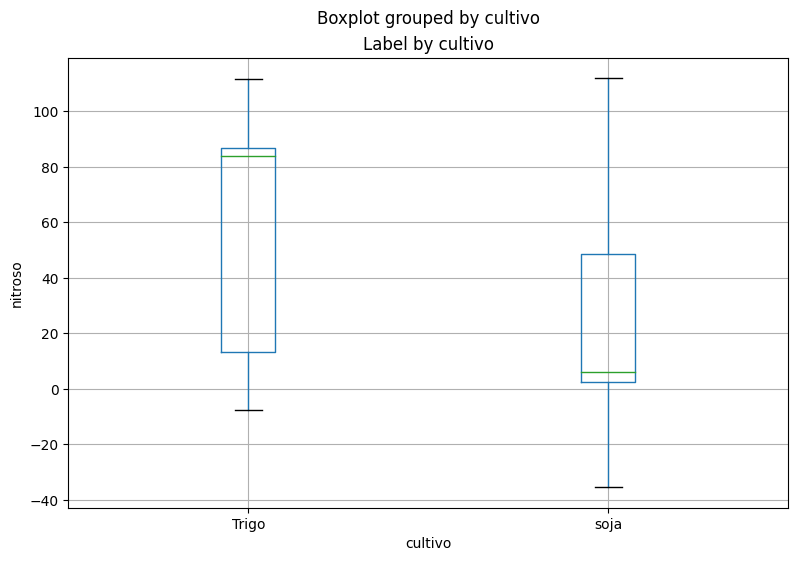

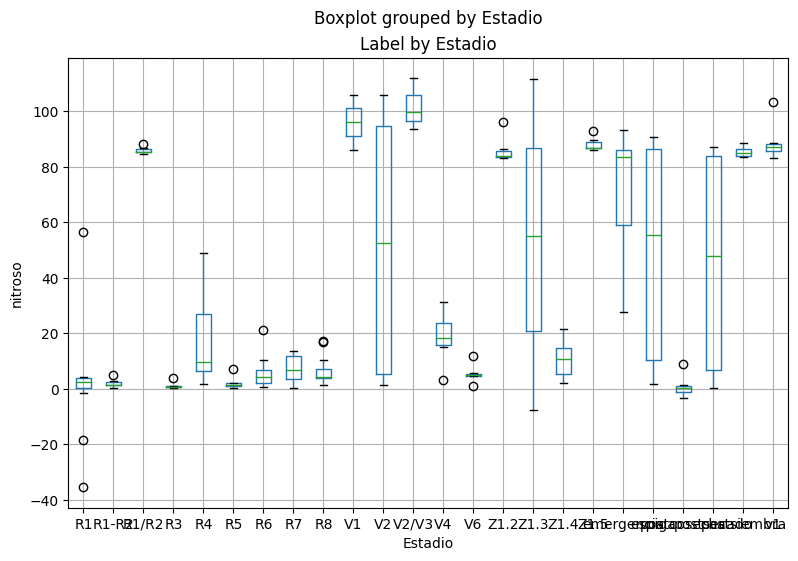

In [13]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    RF_data.boxplot(column = 'n2o', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("nitroso")
plt.show()

In [14]:
# Separate features and labels
X, y = RF_data[['ts','wfps','NO3','NH4','nitrogeno', 'ch4','co2', 'pp_acum5']].values, RF_data['n2o'].values
print('Features:',X[:7], '\nLabels:', y[:7], sep='\n')

Features:
[[  7.3         55.25392825  11.725        2.625       14.35
   -6.59625222  78.23164487  22.5       ]
 [  7.4         65.75509472  13.125        2.97        16.095
   -8.93956936 168.34035919  22.5       ]
 [  7.5         56.08649357   8.225        3.85        12.075
    1.23685088  31.8932632   22.5       ]
 [  7.2         60.98886545  11.725        5.425       17.15
   -8.17738174 117.22911008  22.5       ]
 [  7.3         57.35222745  10.325        3.5         13.825
   -8.66287944 111.70458443  22.5       ]
 [  7.4         61.26994021  14.525        1.4         15.925
    3.21350494  61.46651069  22.5       ]
 [  8.2         31.55978381  16.975        1.925       18.9
   -3.59488325  55.96833985   0.        ]]

Labels:
[-7.6226259  24.45704706  0.92926005 28.01247681  9.481146   25.18429406
 15.66092551]


In [15]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 142 rows
Test Set: 62 rows


In [16]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [17]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [32. 46. 49. 33. 32.  4. 58. 27. 20. 38.]
Actual labels   :  [ 8.00291367  1.11572277  5.54241981 25.67193704 13.28649337  6.87736555
 25.18429406  3.8720764  11.3615135  86.07821989]


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Emisiones de nitroso Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

Algoritmos LASSO

In [ ]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('óxido nitroso Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

arboles de desición

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

In [ ]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('óxido nitroso Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RANDOM FOREST

RandomForestRegressor() 

MSE: 248.65928914822564
RMSE: 15.768934306040647
R2: 0.8219672606445908


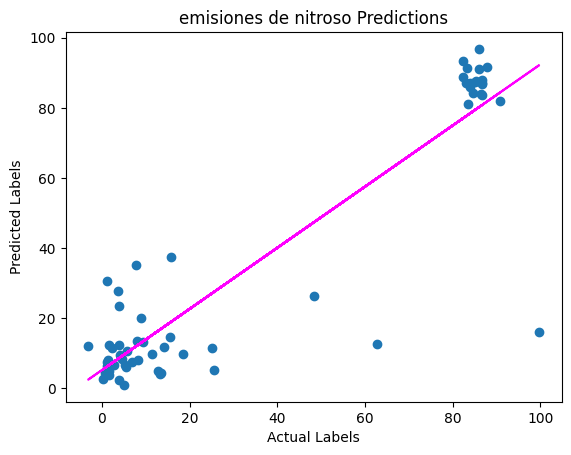

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('emisiones de nitroso Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Emisiones de nitroso Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

optimización de hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Emisiones de nitroso Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

escalando variables

In [ ]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0, 1, 2, 3, 4, 5, 6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
#categorical_features = [2, 4, 5, 6]
#categorical_transformer = Pipeline(steps=[
    #('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])
#,
        #('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

In [ ]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Emisiones de nitroso Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Emisiones de nitroso Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Sacamos co2 y ch4, y dejamos no3 y nh4 separados

In [75]:
numeric_features = ['ts', 'wfps', 'NO3', 'NH4', 'co2', 'pp_acum2', 'pp_acum5']
RF_data[numeric_features + ['n2o']].describe()

,ts,wfps,NO3,NH4,co2,pp_acum2,pp_acum5,n2o
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,16.264379,46.090407,8.804265,7.684534,59.440748,2.252941,13.583333,37.245609
std,4.493934,12.951344,8.678045,14.511923,59.817087,5.002279,17.292033,39.876785
min,5.766667,19.440697,0.000000,-1.400000,-12.249845,0.000000,0.000000,-35.402927
25%,13.875000,37.033508,2.450000,0.525000,8.498297,0.000000,1.000000,3.287613
50%,17.150000,47.837498,6.475000,2.100000,45.726611,0.000000,6.500000,13.032458
75%,19.500000,55.232344,12.293750,5.293750,97.450365,1.400000,22.500000,84.605953
max,28.500000,89.356410,44.100000,93.450000,320.249151,18.700000,70.700000,111.921070


In [76]:
# Separate features and labels
X, y = RF_data[['ts','wfps','NO3','NH4', 'co2', 'pp_acum2', 'pp_acum5']].values, RF_data['n2o'].values
print('Features:',X[:7], '\nLabels:', y[:7], sep='\n')

Features:
[[  7.3         55.25392825  11.725        2.625       78.23164487
   18.7         22.5       ]
 [  7.4         65.75509472  13.125        2.97       168.34035919
   18.7         22.5       ]
 [  7.5         56.08649357   8.225        3.85        31.8932632
   18.7         22.5       ]
 [  7.2         60.98886545  11.725        5.425      117.22911008
   18.7         22.5       ]
 [  7.3         57.35222745  10.325        3.5        111.70458443
   18.7         22.5       ]
 [  7.4         61.26994021  14.525        1.4         61.46651069
   18.7         22.5       ]
 [  8.2         31.55978381  16.975        1.925       55.96833985
    0.           0.        ]]

Labels:
[-7.6226259  24.45704706  0.92926005 28.01247681  9.481146   25.18429406
 15.66092551]


In [85]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 142 rows
Test Set: 62 rows


RandomForestRegressor(max_depth=4, n_estimators=150) 

MSE: 215.34446353235055
RMSE: 14.674619706566522
R2: 0.8458196961834314


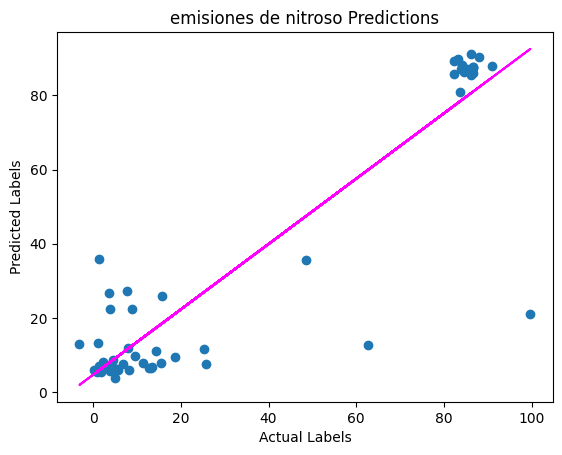

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor(n_estimators=150, max_depth=4).fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('emisiones de nitroso Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

crear arbol

In [82]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(model.estimators_[0], out_file=None,
                           feature_names=X.columns.tolist(), filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

AttributeError: ignored